Example notebook showing how to use the nested sampler with a lower number of live points and MCMC steps

In [1]:
import os
import sys
import argparse
import torch
import logging
from getdist import plots, MCSamples
import getdist
import numpy as np
from scipy.stats import multivariate_normal

In [2]:
path = os.path.realpath(os.path.join(os.getcwd(), '../..'))
sys.path.insert(0, path)

In [3]:
from nnest import NestedSampler
from nnest.likelihoods import *

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
# Likelihood + prior
#like = Himmelblau(2)
#transform = lambda x: 5*x
like = Rosenbrock(4)
transform = lambda x: 5*x
#like = Gaussian(2, 0.9)
#transform = lambda x: 3*x
#like = Eggbox(2)
#transform = lambda x: 5*np.pi*x
#like = GaussianShell(2)
#transform = lambda x: 5*x
#like = GaussianMix(2)
#transform = lambda x: 5*x

In [6]:
sampler = NestedSampler(like.x_dim, like, transform=transform, num_live_points=100, hidden_dim=16, 
                        num_blocks=3, flow='spline')

Creating directory for new run logs/test/run42
[nnest.trainer] [INFO] SingleSpeedSpline(
  (flow): NormalizingFlow(
    (flows): ModuleList(
      (0): ActNorm()
      (1): Invertible1x1Conv()
      (2): NSF_CL(
        (f1): MLP(
          (net): Sequential(
            (0): Linear(in_features=2, out_features=16, bias=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Linear(in_features=16, out_features=16, bias=True)
            (3): LeakyReLU(negative_slope=0.2)
            (4): Linear(in_features=16, out_features=16, bias=True)
            (5): LeakyReLU(negative_slope=0.2)
            (6): Linear(in_features=16, out_features=46, bias=True)
          )
        )
        (f2): MLP(
          (net): Sequential(
            (0): Linear(in_features=2, out_features=16, bias=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Linear(in_features=16, out_features=16, bias=True)
            (3): LeakyReLU(negative_slope=0.2)
            (4): Linear(in_fe

In [7]:
sampler.run(strategy=['rejection_prior', 'rejection_flow', 'mcmc'], mcmc_steps=5*like.x_dim)

[nnest.sampler] [INFO] MCMC steps [20]
[nnest.sampler] [INFO] Initial scale [1.0000]
[nnest.sampler] [INFO] Volume switch [-1.0000]
[nnest.sampler] [INFO] Step [0] loglstar [-1.6635e+05] max logl [-1.2793e+02] logz [-1.6636e+05] vol [1.00000e+00] ncalls [101] mean calls [0.0000]
[nnest.sampler] [INFO] Step [20] loglstar [-6.6833e+04] max logl [-1.2793e+02] logz [-6.6838e+04] vol [8.18731e-01] ncalls [127] mean calls [1.3000]
[nnest.sampler] [INFO] Step [40] loglstar [-5.3475e+04] max logl [-1.2793e+02] logz [-5.3480e+04] vol [6.70320e-01] ncalls [157] mean calls [1.5000]
[nnest.sampler] [INFO] Step [60] loglstar [-4.2277e+04] max logl [-1.2793e+02] logz [-4.2282e+04] vol [5.48812e-01] ncalls [182] mean calls [1.2500]
[nnest.sampler] [INFO] Step [80] loglstar [-3.0613e+04] max logl [-1.2793e+02] logz [-3.0618e+04] vol [4.49329e-01] ncalls [225] mean calls [2.1500]
[nnest.sampler] [INFO] Step [100] loglstar [-2.4998e+04] max logl [-1.2793e+02] logz [-2.5004e+04] vol [3.67879e-01] ncalls 

[nnest.sampler] [INFO] Acceptance [0.6100] min ESS [5.5170] max ESS [11.4546] average jump [0.0345]
[nnest.sampler] [INFO] Step [780] loglstar [-5.4052e+01] maxlogl [-3.6115e+00] logz [-6.5044e+01] vol [4.09735e-04] ncalls [6484] scale [0.1346]
[nnest.trainer] [INFO] Number of training samples [100]
[nnest.trainer] [INFO] Training jitter [0.0058]
[nnest.trainer] [INFO] Epoch [1] train loss [-0.0410] validation loss [-0.3216]
[nnest.trainer] [INFO] Epoch [61] ran out of patience
[nnest.trainer] [INFO] Best epoch [11] validation loss [-0.3423]
[nnest.sampler] [INFO] Acceptance [0.5700] min ESS [4.7965] max ESS [6.5032] average jump [0.0401]
[nnest.sampler] [INFO] Step [800] loglstar [-4.5268e+01] maxlogl [-3.6115e+00] logz [-5.6904e+01] vol [3.35463e-04] ncalls [6794] scale [0.3460]
[nnest.sampler] [INFO] Acceptance [0.4250] min ESS [4.9655] max ESS [10.3261] average jump [0.0355]
[nnest.sampler] [INFO] Step [820] loglstar [-3.9860e+01] maxlogl [-3.6115e+00] logz [-5.1173e+01] vol [2.746

[nnest.trainer] [INFO] Number of training samples [100]
[nnest.trainer] [INFO] Training jitter [0.0018]
[nnest.trainer] [INFO] Epoch [1] train loss [-0.0960] validation loss [-0.8330]
[nnest.trainer] [INFO] Epoch [100] train loss [-0.1073] validation loss [-0.9104]
[nnest.trainer] [INFO] Epoch [137] ran out of patience
[nnest.trainer] [INFO] Best epoch [87] validation loss [-0.9352]
[nnest.sampler] [INFO] Acceptance [0.5100] min ESS [5.2186] max ESS [19.1468] average jump [0.0305]
[nnest.sampler] [INFO] Step [1300] loglstar [-3.6144e+00] maxlogl [-3.9348e-01] logz [-1.6854e+01] vol [2.26033e-06] ncalls [15450] scale [0.9457]
[nnest.sampler] [INFO] Acceptance [0.4850] min ESS [4.1196] max ESS [16.4383] average jump [0.0248]
[nnest.sampler] [INFO] Step [1320] loglstar [-3.3337e+00] maxlogl [-3.9348e-01] logz [-1.6621e+01] vol [1.85060e-06] ncalls [15758] scale [0.2006]
[nnest.sampler] [INFO] Acceptance [0.5900] min ESS [4.7108] max ESS [21.0000] average jump [0.0325]
[nnest.sampler] [INF

In [8]:
print(sampler.logz)

-14.921588830823927


In [9]:
mc = MCSamples(samples=sampler.samples, weights=sampler.weights, loglikes=-sampler.loglikes)

Removed no burn in


In [10]:
print(mc.getEffectiveSamples())
print(mc.getMargeStats())
print(mc.likeStats)

659.8675554545464
Marginalized limits: 0.68; 0.95; 0.99

parameter   mean           sddev          lower1         upper1         limit1 lower2         upper2         limit2 lower3         upper3         limit3 
param1      8.3909374E-01  3.2727117E-01  7.5180939E-01  1.1508912E+00  two    1.2777042E-01  1.2553548E+00  two   -9.9162149E-01  1.3134860E+00  two     p_{1}
param2      8.1811286E-01  3.5899167E-01  5.5238023E-01  1.2602425E+00  two    6.7281199E-02  1.4182113E+00  two   -1.1900194E-01  1.5335698E+00  two     p_{2}
param3      8.0108705E-01  5.2762675E-01  1.7657792E-01  1.3713904E+00  two   -1.5042352E-01  1.7992255E+00  two   -3.4788555E-01  2.0494420E+00  two     p_{3}
param4      9.2191679E-01  9.3007032E-01 -1.2464552E-01  1.3074164E+00  two   -2.1526248E-01  2.9479534E+00  two   -2.6697401E-01  3.5790025E+00  two     p_{4}

Best fit sample -log(Like) = 0.208062
mean(-Ln(like)) = 2.095895
-Ln(mean like)  = 1.458709

parameter   bestfit        lower1         upper1       

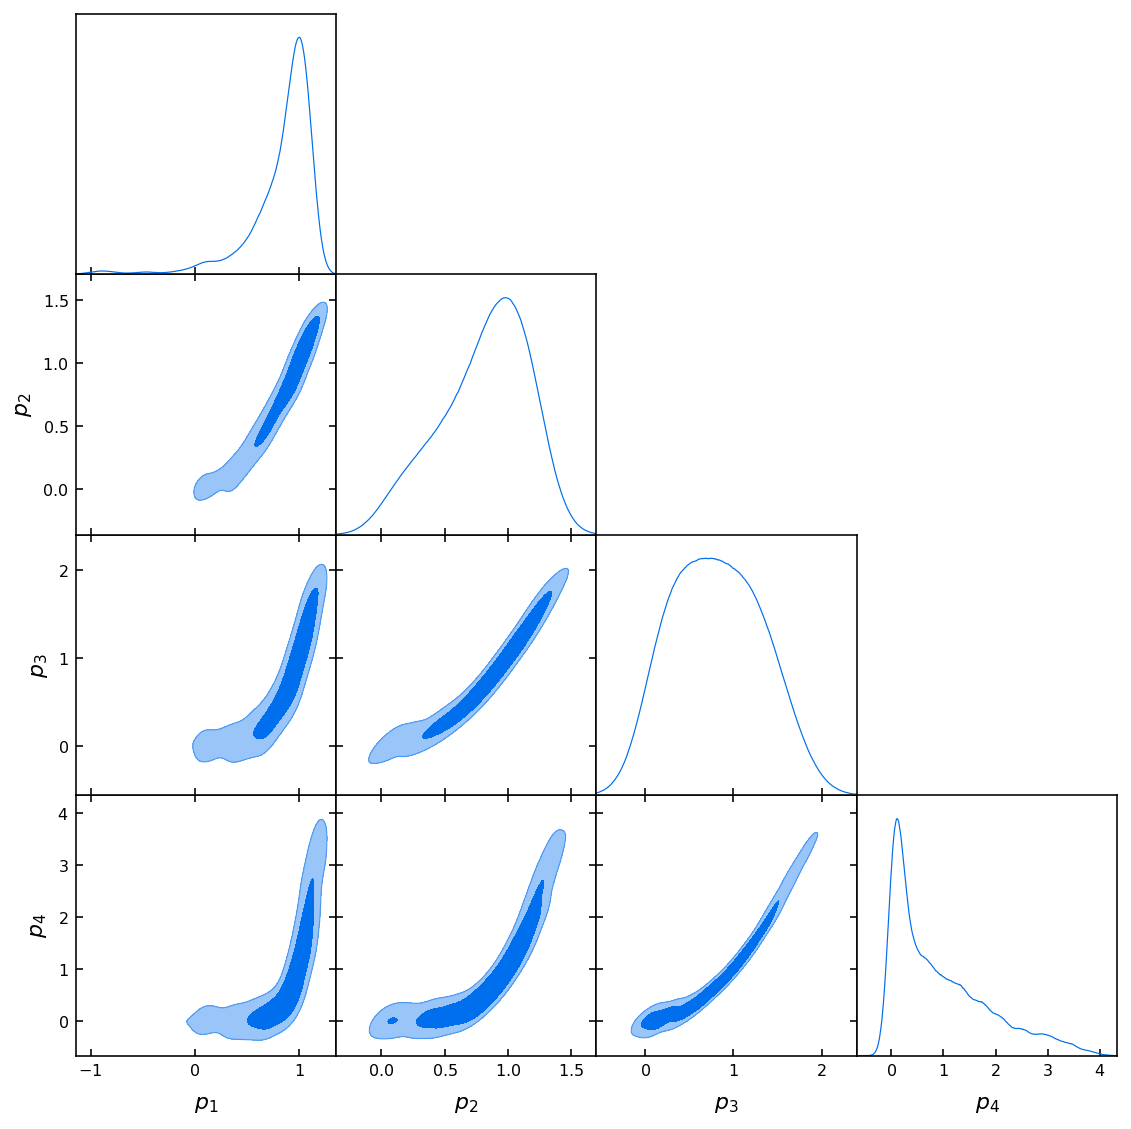

In [11]:
g = plots.getSubplotPlotter(width_inch=8)
g.triangle_plot(mc, filled=True)